In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import datetime
import typhon as ty

# use typhon ploting style
plt.style.use(ty.plots.styles.get('typhon'))

/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/typhon/nonlte/rtc/__init__.py:9: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def FOSC(tau, Sb, Sm, Ib):


In [3]:
p5 = xr.open_dataset('/net/secaire/mringel/data/lwp_retrieved/all_campaigns_P5_lwp_v4.nc')
era5 = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/all_campaigns_ERA5_lwp_v2.nc')
aqua = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_aqua_lwp_v2.nc')
terra = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_modis/all_campaigns_P5_MODIS_terra_lwp_v2.nc')
amsr = xr.open_dataset('/net/secaire/mringel/data/lwp_collocated/lwp_amsr2/all_campaigns_P5_AMSR_lwp_v4.nc')

terra = terra.where(terra.lwp!=-9999.)
aqua = aqua.where(aqua.lwp!=-9999.)
amsr = amsr.where(amsr.lwp!=-9999.)

In [4]:
mcao_daily = xr.open_mfdataset('/net/secaire/mringel/data/cwt_mcao_ind/mcao_*_v1.nc')
mcao_second = mcao_daily.resample(time='1S').pad()
mcao_second = mcao_second.sel(time=p5.time,drop=True).compute()

mcao_daily_v2 = xr.open_mfdataset('/net/secaire/mringel/data/cwt_mcao_ind/mcao_*_v2.nc')
mcao_second_v2 = mcao_daily_v2.resample(time='1S').pad()
mcao_second_v2 = mcao_second_v2.sel(time=p5.time,drop=True).compute()

p5_daily_mean = p5.resample(time='1D').mean().compute()
p5_daily_min = p5.resample(time='1D').min().compute()
p5_daily_max = p5.resample(time='1D').max().compute()
p5_daily_std = p5.resample(time='1D').std().compute()
mcao_daily_p5 = mcao_daily_v2.resample(time='1D').mean().compute().sel(time=p5_daily_mean.time,drop=True)

In [5]:
lower_quantile = 0.1
upper_quantile = 0.9

era5_daily_mean = era5.resample(time='1D').mean().compute()
era5_daily_min = era5.resample(time='1D').quantile(lower_quantile).compute()
era5_daily_max = era5.resample(time='1D').quantile(upper_quantile).compute()
era5_daily_std = era5.resample(time='1D').std().compute()
mcao_daily_era5 = mcao_daily_v2.resample(time='1D').mean().compute().sel(time=era5_daily_mean.time,drop=True)

terra_daily_mean = terra.resample(time='1D').mean().compute()
terra_daily_min = terra.resample(time='1D').quantile(lower_quantile).compute()
terra_daily_max = terra.resample(time='1D').quantile(upper_quantile).compute()
terra_daily_std = terra.resample(time='1D').std().compute()
mcao_daily_terra = mcao_daily_v2.resample(time='1D').mean().compute().sel(time=terra_daily_mean.time,drop=True)

aqua_daily_mean = aqua.resample(time='1D').mean().compute()
aqua_daily_min = aqua.resample(time='1D').quantile(lower_quantile).compute()
aqua_daily_max = aqua.resample(time='1D').quantile(upper_quantile).compute()
aqua_daily_std = aqua.resample(time='1D').std().compute()
mcao_daily_aqua = mcao_daily_v2.resample(time='1D').mean().compute().sel(time=aqua_daily_mean.time,drop=True)

amsr_daily_mean = amsr.resample(time='1D').mean().compute()
amsr_daily_min = amsr.resample(time='1D').quantile(lower_quantile).compute()
amsr_daily_max = amsr.resample(time='1D').quantile(upper_quantile).compute()
amsr_daily_std = amsr.resample(time='1D').std().compute()
mcao_daily_amsr = mcao_daily_v2.resample(time='1D').mean().compute().sel(time=amsr_daily_mean.time,drop=True)

/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(
/net/secaire/mringel/.conda/envs/ac3env/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1545: RuntimeWarning: All

In [6]:
mcaos = [mcao_daily_p5.MCAO,
         mcao_daily_era5.MCAO,
         mcao_daily_terra.MCAO,
         mcao_daily_aqua.MCAO,
         mcao_daily_amsr.MCAO]
daily_means = [p5_daily_mean.lwp*1000,
               era5_daily_mean.lwp*1000,
               terra_daily_mean.lwp,
               aqua_daily_mean.lwp,
               amsr_daily_mean.lwp*1000]
daily_min = [p5_daily_min.lwp*1000,
             era5_daily_min.lwp*1000,
             terra_daily_min.lwp,
             aqua_daily_min.lwp,
             amsr_daily_min.lwp*1000]
daily_max = [p5_daily_max.lwp*1000,
             era5_daily_max.lwp*1000,
             terra_daily_max.lwp,
             aqua_daily_max.lwp,
             amsr_daily_max.lwp*1000]
daily_std = [p5_daily_std.lwp*1000,
             era5_daily_std.lwp*1000,
             terra_daily_std.lwp,
             aqua_daily_std.lwp,
             amsr_daily_std.lwp*1000]

Text(0.48, -0.02, 'MCAO')

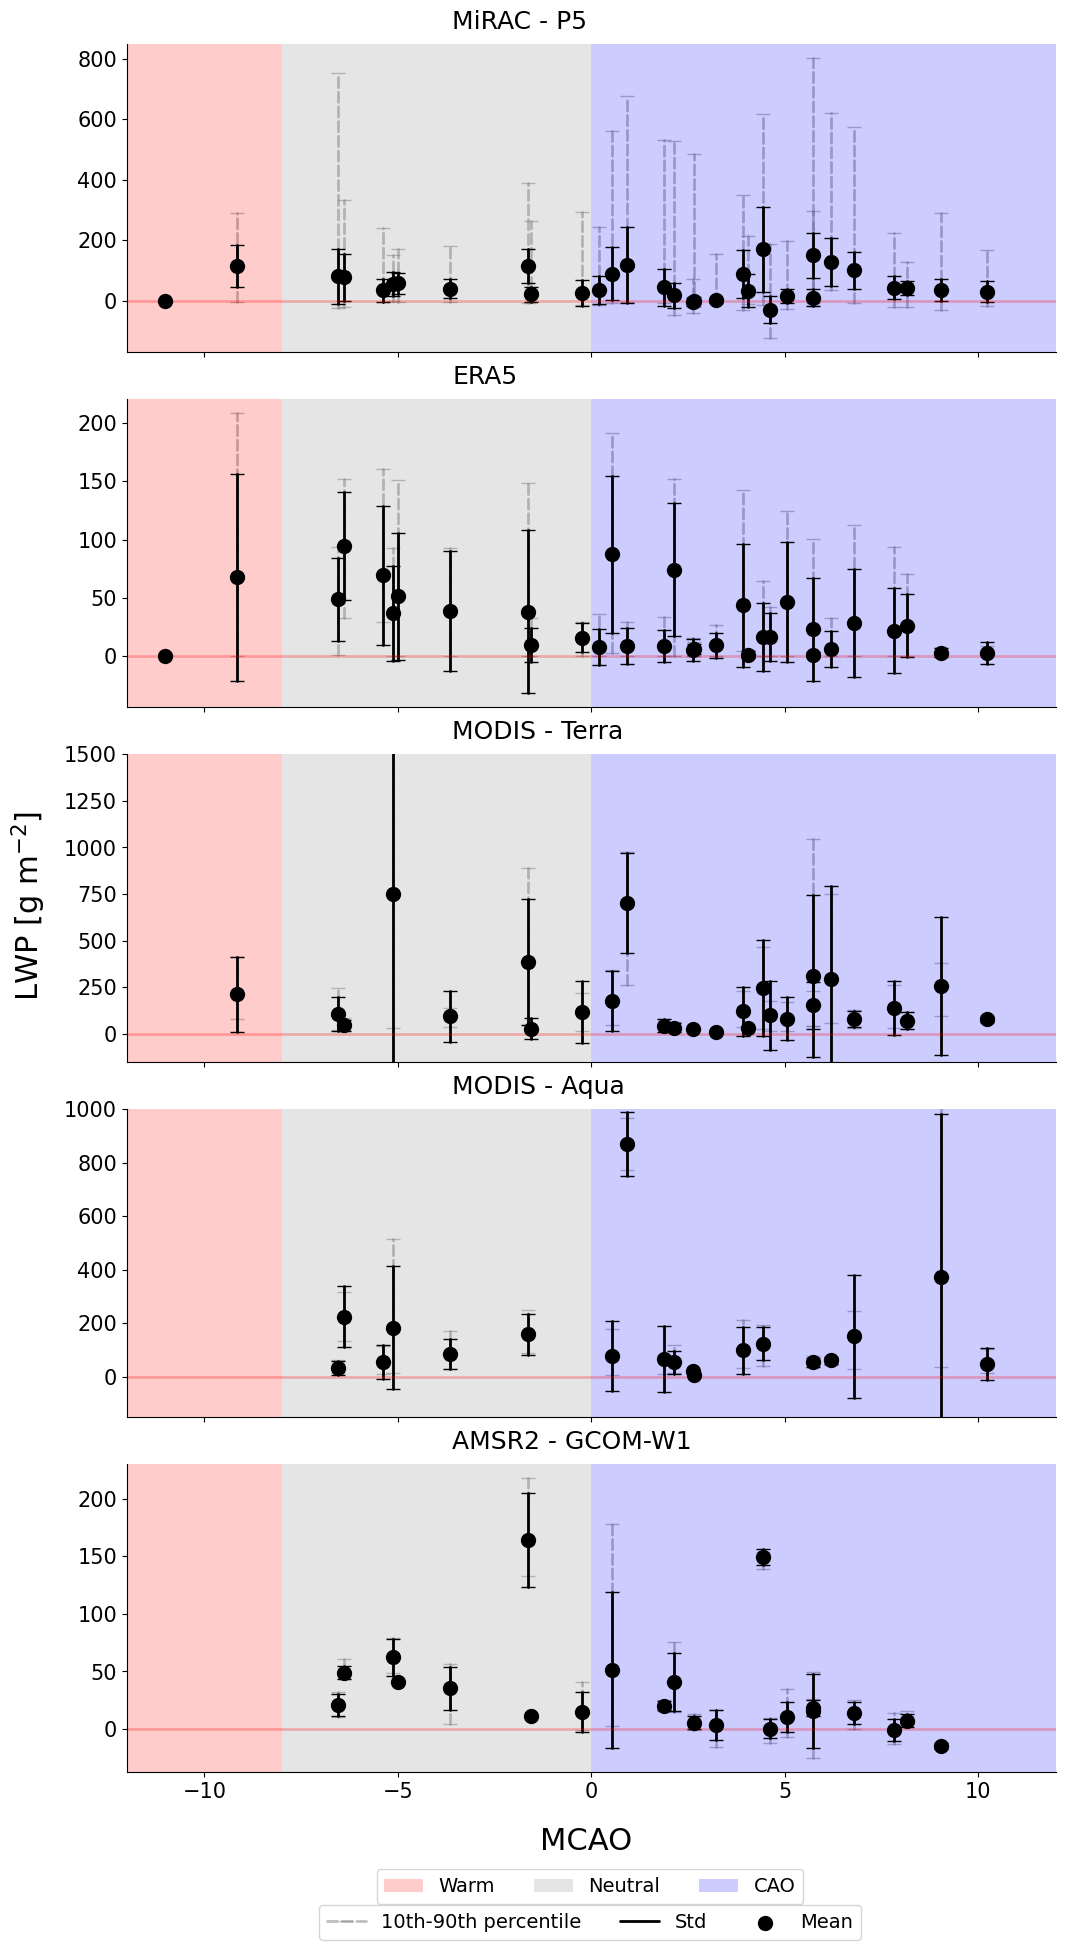

In [7]:
fig, axs = plt.subplots(5,1,figsize=(10,18),sharex=True,sharey=False)

platform_labels = ['MiRAC - P5','ERA5','MODIS - Terra', 'MODIS - Aqua','AMSR2 - GCOM-W1']

for j, platform in enumerate(platform_labels):

    axs[j].set_xlim(-12,12)

    axs[j].axvspan(-12,-8,facecolor='red',alpha=0.2,label='Warm')
    axs[j].axvspan(-8,0,facecolor='grey',alpha=0.2,label='Neutral')
    axs[j].axvspan(0,12,facecolor='blue',alpha=0.2,label='CAO')

    axs[j].text(0.35,1.05,platform_labels[j],transform=axs[j].transAxes)

    axs[j].axhline(y=0,color='red',alpha=0.25,linestyle='solid')

    # plot min-max range
    axs[j].plot((mcaos[j],mcaos[j]),(daily_min[j],daily_max[j]),
                marker='_',linestyle='dashed',c='grey',alpha=0.5,zorder=0,label='10th-90th percentile')
    # plot std range
    axs[j].plot((mcaos[j],mcaos[j]),(daily_means[j]+daily_std[j],daily_means[j]-daily_std[j]),
                marker='_',linestyle='solid',c='black',zorder=1,label='Std')
    # plot means
    axs[j].scatter(mcaos[j],daily_means[j],color='black',zorder=2,label='Mean')

    if j == 2:
        axs[j].set_ylim(-150,1500)
    if j == 3:
        axs[j].set_ylim(-150,1000)
    
    #axs[j].set_ylim(bottom=-100)

    handles, lgd_labels = axs[j].get_legend_handles_labels()

indices = [0,1,2,3,1785,-1]

fig.legend([handles[index] for index in indices[:3]], [lgd_labels[index] for index in indices[:3]], 
           prop={'size': 14}, loc='lower center', ncols=3, bbox_to_anchor=(0.53,-0.06))
fig.legend([handles[index] for index in indices[3:]], [lgd_labels[index] for index in indices[3:]], 
           prop={'size': 14}, loc='lower center', ncols=3, bbox_to_anchor=(0.53,-0.08))

fig.text(-0.05, 0.5,'LWP [g m$^{-2}$]',rotation=90,fontsize=22,va='center')
fig.text(0.48, -0.02,'MCAO',fontsize=22,va='center')

#plt.savefig('/home/mringel/lwp_project/figures/cwt_mcao_statistics/lwp_vs_mcao_all_platforms.png',
#            bbox_inches='tight',
#            dpi=200)

In [9]:
daily_min[j]

<xarray.DataArray 'lwp' (time: 1782)>
array([14.49943054,         nan,         nan, ...,         nan,
               nan, -0.75056998])
Coordinates:
  * time      (time) datetime64[ns] 2017-05-25 2017-05-26 ... 2022-04-10
    quantile  float64 0.1